In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
batting_data = pd.read_csv('mlb_batting.csv')
df = batting_data

In [3]:
# Print any columns that contain nan values
print(df.columns[df.isnull().any()])

Index(['avg_swing_speed', 'fast_swing_rate', 'blasts_contact', 'blasts_swing',
       'squared_up_contact', 'squared_up_swing', 'avg_swing_length', 'swords'],
      dtype='object')


In [4]:
# Remove nan value columns from data for PCA
for col in df.columns[df.isnull().any()]:
    del df[col]

In [5]:
print(df.columns[:])

Index(['name_last_first', 'player_id', 'year', 'player_age', 'ab', 'pa', 'hit',
       'single', 'double', 'triple', 'home_run', 'strikeout', 'walk',
       'k_percent', 'bb_percent', 'batting_avg', 'slg_percent',
       'on_base_percent', 'on_base_plus_slg', 'b_ball', 'b_called_strike',
       'b_foul', 'b_foul_tip', 'b_swinging_strike', 'r_run', 'b_total_ball',
       'b_total_sacrifices', 'b_total_strike', 'b_total_swinging_strike',
       'xba', 'xslg', 'woba', 'xwoba', 'xobp', 'xiso', 'xbadiff', 'xslgdiff',
       'exit_velocity_avg', 'launch_angle_avg', 'sweet_spot_percent', 'barrel',
       'barrel_batted_rate', 'solidcontact_percent', 'flareburner_percent',
       'poorlyweak_percent', 'hard_hit_percent', 'avg_best_speed',
       'avg_hyper_speed', 'z_swing_percent', 'z_swing_miss_percent',
       'oz_swing_percent', 'oz_swing_miss_percent', 'out_zone_swing',
       'out_zone_percent', 'out_zone', 'meatball_swing_percent',
       'meatball_percent', 'pitch_count_offspeed', 'pit

In [6]:
# Remove remaining nan value columns from data for PCA
col_removal = ['name_last_first', 'player_id', 'year', 'player_age', 
               'avg_swing_speed', 'fast_swing_rate', 'blasts_contact', 
               'blasts_swing', 'squared_up_swing','squared_up_contact', 'avg_swing_length', 'swords']
for col in df:
    if col in col_removal:
        del df[col]

In [7]:
print(df.columns[:])

Index(['ab', 'pa', 'hit', 'single', 'double', 'triple', 'home_run',
       'strikeout', 'walk', 'k_percent', 'bb_percent', 'batting_avg',
       'slg_percent', 'on_base_percent', 'on_base_plus_slg', 'b_ball',
       'b_called_strike', 'b_foul', 'b_foul_tip', 'b_swinging_strike', 'r_run',
       'b_total_ball', 'b_total_sacrifices', 'b_total_strike',
       'b_total_swinging_strike', 'xba', 'xslg', 'woba', 'xwoba', 'xobp',
       'xiso', 'xbadiff', 'xslgdiff', 'exit_velocity_avg', 'launch_angle_avg',
       'sweet_spot_percent', 'barrel', 'barrel_batted_rate',
       'solidcontact_percent', 'flareburner_percent', 'poorlyweak_percent',
       'hard_hit_percent', 'avg_best_speed', 'avg_hyper_speed',
       'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent',
       'oz_swing_miss_percent', 'out_zone_swing', 'out_zone_percent',
       'out_zone', 'meatball_swing_percent', 'meatball_percent',
       'pitch_count_offspeed', 'pitch_count_fastball', 'pitch_count_breaking',
       'pi

In [8]:
def run_pca_analysis(X, selected_features=None, n_components_plot=20):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = pca.explained_variance_ratio_
    
    plt.figure(figsize=(10,6))
    plt.plot(range(1, n_components_plot+1), explained_variance.cumsum()[:n_components_plot], marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Principal Components')
    plt.grid(True)
    plt.show()
    loadings = pd.DataFrame(pca.components_.T, index=X.columns, 
                            columns=[f'PC{i+1}' for i in range(X.shape[1])])

    if selected_features is not None:
        print("\nImportance (absolute loading) of features PC1:")
        for feature in selected_features:
            if feature in loadings.index:
                print(f"{feature}: {loadings.loc[feature, 'PC1']:.4f}")
            else:
                print(f"{feature}: NOT FOUND in dataset columns!")
    
    return loadings

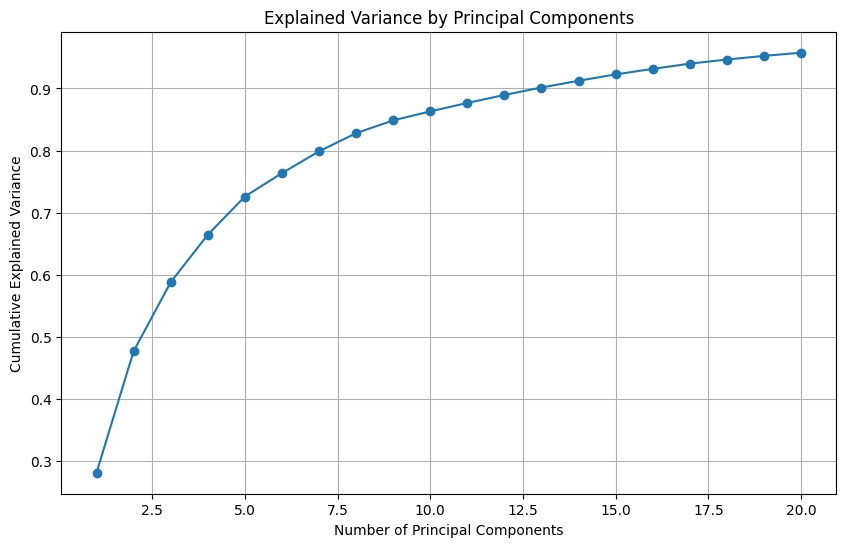


Importance (absolute loading) of features PC1:
ab: 0.1888
pa: 0.1990
hit: 0.1804
single: 0.1262
double: 0.1590
triple: 0.0415
home_run: 0.1579
strikeout: 0.1474
walk: 0.1544
k_percent: 0.0071
bb_percent: 0.0529
batting_avg: 0.0483
slg_percent: 0.0901
on_base_percent: 0.0714
on_base_plus_slg: 0.0915
b_ball: 0.1957
b_called_strike: 0.1384
b_foul: 0.1821
b_foul_tip: 0.1305
b_swinging_strike: 0.1373
r_run: 0.1923
b_total_ball: 0.1978
b_total_sacrifices: 0.0579
b_total_strike: 0.1973
b_total_swinging_strike: 0.0908
xba: 0.0562
xslg: 0.0909
woba: 0.0902
xwoba: 0.0900
xobp: 0.0730
xiso: 0.0852
xbadiff: 0.0029
xslgdiff: -0.0100
exit_velocity_avg: 0.0795
launch_angle_avg: 0.0425
sweet_spot_percent: 0.0521
barrel: 0.1588
barrel_batted_rate: 0.0749
solidcontact_percent: 0.0648
flareburner_percent: -0.0131
poorlyweak_percent: -0.0526
hard_hit_percent: 0.0690
avg_best_speed: 0.0733
avg_hyper_speed: 0.0727
z_swing_percent: 0.0066
z_swing_miss_percent: 0.0167
oz_swing_percent: -0.0272
oz_swing_miss_

In [9]:
selected_stats = df.columns
loadings = run_pca_analysis(df, selected_features=selected_stats)

In [10]:
pc1_sorted = loadings['PC1'].sort_values()
print(pc1_sorted[-40:])

barrel_batted_rate         0.074856
exit_velocity_avg          0.079534
xiso                       0.085246
popups                     0.087449
xwoba                      0.089961
slg_percent                0.090147
woba                       0.090236
b_total_swinging_strike    0.090818
xslg                       0.090950
on_base_plus_slg           0.091550
groundballs                0.108023
single                     0.126183
b_foul_tip                 0.130517
in_zone_swing_miss         0.134526
b_swinging_strike          0.137320
b_called_strike            0.138444
pitch_count_offspeed       0.142598
out_zone_swing             0.143485
strikeout                  0.147364
linedrives                 0.148196
walk                       0.154411
home_run                   0.157949
barrel                     0.158840
double                     0.158951
batted_ball                0.162860
flyballs                   0.168199
hit                        0.180444
b_foul                     0